In [ ]:
!pip install tensorflow

In [ ]:
!pip install matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


#load data
(x_train , y_train) , (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

#build the model
model = models.Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(128 , activation='relu'),
    layers.Dense(10 ,activation= 'softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#evaulate model
model.fit(x_train, y_train , epochs=5)

#print results
test_loss , test_acc = model.evaluate(x_test , y_test)

print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8731 - loss: 0.4389
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9639 - loss: 0.1213
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9756 - loss: 0.0820
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9822 - loss: 0.0574
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9871 - loss: 0.0436
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9714 - loss: 0.0857
Test Accuracy: 0.9745


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


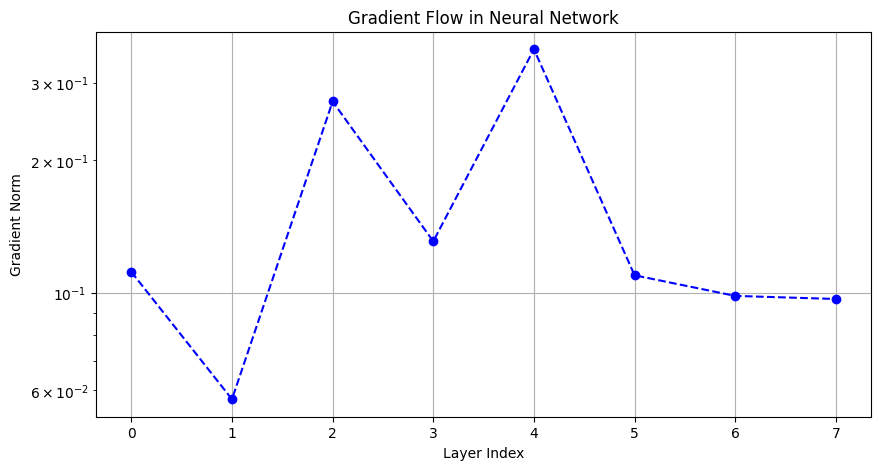

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape for CNN compatibility
x_test = x_test.reshape(-1, 28, 28, 1)


# Define a simple neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Take a batch of training data
batch_size = 128
x_batch, y_batch = x_train[:batch_size], y_train[:batch_size]

# Compute gradients
with tf.GradientTape() as tape:
    predictions = model(x_batch, training=True)
    loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch, predictions)
    loss = tf.reduce_mean(loss)

gradients = tape.gradient(loss, model.trainable_variables)

# Compute gradient norms for each layer
grad_norms = [tf.norm(g).numpy() for g in gradients if g is not None]

# Plot Gradient Norms
plt.figure(figsize=(10, 5))
plt.plot(range(len(grad_norms)), grad_norms, marker='o', linestyle='--', color='b')
plt.xlabel("Layer Index")
plt.ylabel("Gradient Norm")
plt.title("Gradient Flow in Neural Network")
plt.yscale("log")  # Log scale to better visualize variations
plt.grid()
plt.show()
